In [1]:
import pandas as pd
import numpy as np





filename = "/content/home47_hall654_sensor1221_gas-pulse_gas.csv"

# Read the data from the CSV file
data2 = pd.read_csv(filename, header=None)

data2.head()
data2.columns = ['datetime', 'gas']

In [2]:
data2['datetime'] = pd.to_datetime(data2['datetime'])

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36809 entries, 0 to 36808
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  36809 non-null  datetime64[ns]
 1   gas       36809 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 575.3 KB


In [4]:
# calculate the time difference between consecutive rows
data2['time_diff'] = data2['datetime'].diff().dt.seconds

In [5]:
data2['gas'] = (data2['gas'] - 112)

In [6]:
data2

,datetime,gas,time_diff
0,2016-09-20 08:08:46,0,NaN
1,2016-09-20 08:09:05,0,19.0
2,2016-09-20 16:25:27,0,29782.0
3,2016-09-20 17:20:04,0,3277.0
4,2016-09-20 17:22:10,0,126.0
...,...,...,...
36804,2017-05-08 18:38:23,0,128.0
36805,2017-05-08 18:38:58,0,35.0
36806,2017-05-08 18:39:16,0,18.0
36807,2017-05-08 18:43:34,0,258.0


In [7]:
daily = data2.resample('D', on='datetime').sum()

In [8]:
daily

,gas,time_diff
datetime,,
2016-09-20,0,40000.0
2016-09-21,0,84840.0
2016-09-22,0,100774.0
2016-09-23,222,72147.0
2016-09-24,0,60409.0
...,...,...
2017-05-04,1002,92648.0
2017-05-05,333,86658.0
2017-05-06,2452,74804.0


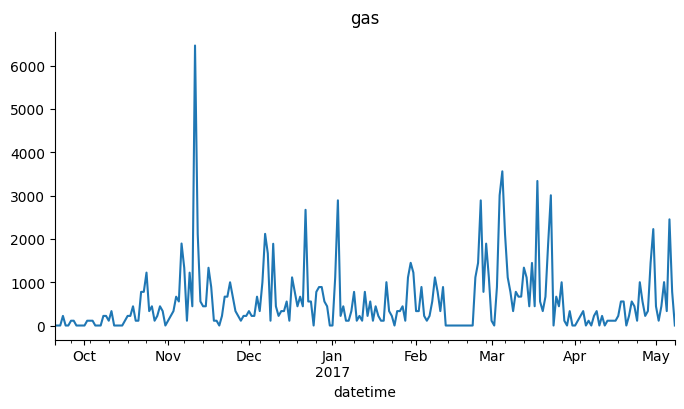

In [9]:
from matplotlib import pyplot as plt
daily['gas'].plot(kind='line', figsize=(8, 4), title='gas')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 231 entries, 2016-09-20 to 2017-05-08
Freq: D
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas        231 non-null    int64  
 1   time_diff  231 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.4 KB
